In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

udfs = ['UDF₁', 'UDF₂', 'UDF₃', 'UDF₄', 'UDF₅']
#without debugger
workflow_time_no_debug = [1011,1485,243,37,24]
udf_time_no_debug = [1010.15,1481,242,35.57,11.9]

workflow_time_debug = [2092,5984,593,55,32]
udf_time_debug = [2089.15,5617.35,590.62,55.14,18.13]
breakpoint_times = [282.39,31.10,10.62,0.26,0.18]

workflow_time_op1 = [1001,1541,247,0,14]
udf_time_op1 = [999.71,1538.53,243.12,0,7.9]

workflow_time_op2 = [1050,1472,253,30,12]
udf_time_op2 = [1012,1469.65,251,29.79,7.08]

workflow_time_op1_op2 = [654, 1469, 237, 0, 12]
udf_time_op1_op2 = [652, 1466.75, 235.92, 0, 7.09]


fig_20_x = ["200K", "400K", "800K", "1.6M"]

fig_20_udon = [215, 210, 210, 210]

fig23_op = ["8c82afbd-3926-4ff5-873a-d5d1e84f64d9",
            "21e8857b-8c1b-4cc0-9b88-03026d791e2a",
            "e6e9797a-fe9d-444a-bc43-1f28f42b9f03"]
fig_23_no_debug_workflow_time_s1 = [1556]
fig_23_no_debug_udf_time_s1 = [305.17, 303.3, 1551]

fig_23_passive_workflow_time_s1 = [2334]
fig_23_passive_udf_time_s1 = [304.8, 306.65, 1551]

fig_23_active_workflow_time_s1 = [1562]
fig_23_active_udf_time_s1 = [304.07, 305.91, 1558]

fig_23_no_debug_workflow_time_s10 = [1615]
fig_23_no_debug_udf_time_s10 = [363.03, 368.96, 1606.95]

fig_23_active_workflow_time_s10 = [1596]
fig_23_active_udf_time_s10 = [306.03, 308.93, 1590]

fig_23_passive_workflow_time_s10 = [2311]
fig_23_passive_udf_time_s10 = [308.41, 310.26, 2306.77]

ratios = [0.01,0.5,1]

fig24_state_10_8c82afbd = [634.41,537.25,692.29]
fig24_state_10_21e8857b = [0,0,310.25]
fig24_state_10_e6e9797a = [0,0,2306.77]

fig24_state_1_8c82afbd = [558.75,648.96,607.79]
fig24_state_1_21e8857b = [560.51,0,306.65]
fig24_state_1_e6e9797a = [2579.91,0,1558.54]


In [33]:
percentage_no_debug = [round((udf / workflow) * 100, 2) for udf, workflow in zip(udf_time_no_debug, workflow_time_no_debug)]
percentage_debug = [round((udf / workflow) * 100, 2) for udf, workflow in zip(udf_time_debug, workflow_time_debug)]

data_no_debug = {
    'UDF execution time (s)': udf_time_no_debug,
    'Workflow execution time (s)': workflow_time_no_debug,
    'Percentage (UDF/Workflow)': [f"{p}%" for p in percentage_no_debug]
}

data_debug = {
    'UDF execution time (s)': udf_time_debug,
    'Workflow execution time (s)': workflow_time_debug,
    'Percentage (UDF/Workflow)': [f"{p}%" for p in percentage_debug]
}

df_no_debug = pd.DataFrame(data_no_debug, index=udfs).T
df_debug = pd.DataFrame(data_debug, index=udfs).T

print("No debugger")
display(df_no_debug)

print("\nWith debugger")
display(df_debug)

No debugger


,UDF₁,UDF₂,UDF₃,UDF₄,UDF₅
UDF execution time (s),1010.15,1481.0,242.0,35.57,11.9
Workflow execution time (s),1011,1485,243,37,24
Percentage (UDF/Workflow),99.92%,99.73%,99.59%,96.14%,49.58%



With debugger


,UDF₁,UDF₂,UDF₃,UDF₄,UDF₅
UDF execution time (s),2089.15,5617.35,590.62,55.14,18.13
Workflow execution time (s),2092,5984,593,55,32
Percentage (UDF/Workflow),99.86%,93.87%,99.6%,100.25%,56.66%


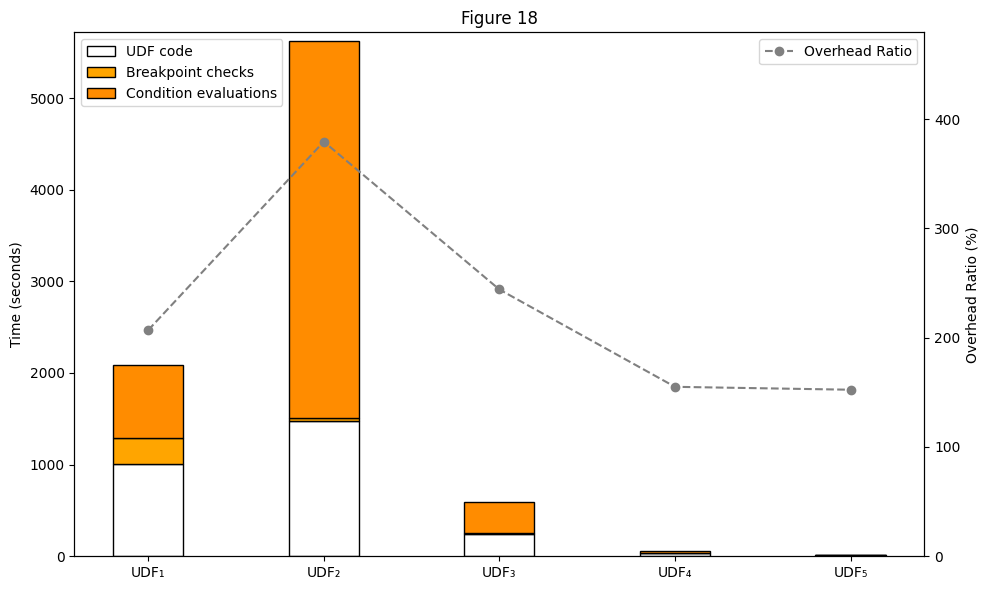

In [19]:

# Calculate condition evaluations as udf_time_debug - udf_time_no_debug - breakpoint_times
condition_evaluation_times = [debug - no_debug - breakpoint for debug, no_debug, breakpoint in zip(udf_time_debug, udf_time_no_debug, breakpoint_times)]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.4
x = np.arange(len(udfs))

# Plot the base UDF execution times (white bar)
base_bars = ax1.bar(x, udf_time_no_debug, bar_width, color='white', edgecolor='black', label='UDF code')

# Plot the breakpoint checks (orange bar)
breakpoint_bars = ax1.bar(x, breakpoint_times, bar_width, bottom=udf_time_no_debug, edgecolor='black', color='orange', label='Breakpoint checks')

# Plot the condition evaluations (darker orange bar)
condition_bars = ax1.bar(x, condition_evaluation_times, bar_width, edgecolor='black', bottom=[udf + bp for udf, bp in zip(udf_time_no_debug, breakpoint_times)], color='darkorange', label='Condition evaluations')

# Set labels and titles
#ax1.set_xlabel('UDFs')
ax1.set_ylabel('Time (seconds)')
ax1.set_xticks(x)
ax1.set_xticklabels(udfs)
ax1.set_ylim(0, max(udf_time_debug) + 100)
ax1.legend(loc='upper left')

# Add secondary y-axis for overhead ratio
overhead_ratios = [(debug / no_debug) * 100 for debug, no_debug in zip(udf_time_debug, udf_time_no_debug)]
ax2 = ax1.twinx()
ax2.plot(x, overhead_ratios, color='grey', marker='o', linestyle='--', label='Overhead Ratio')
ax2.set_ylabel('Overhead Ratio (%)')
ax2.set_ylim(0, max(overhead_ratios) + 100)
ax2.legend(loc='upper right')

plt.title('Figure 18')
plt.tight_layout()
plt.show()

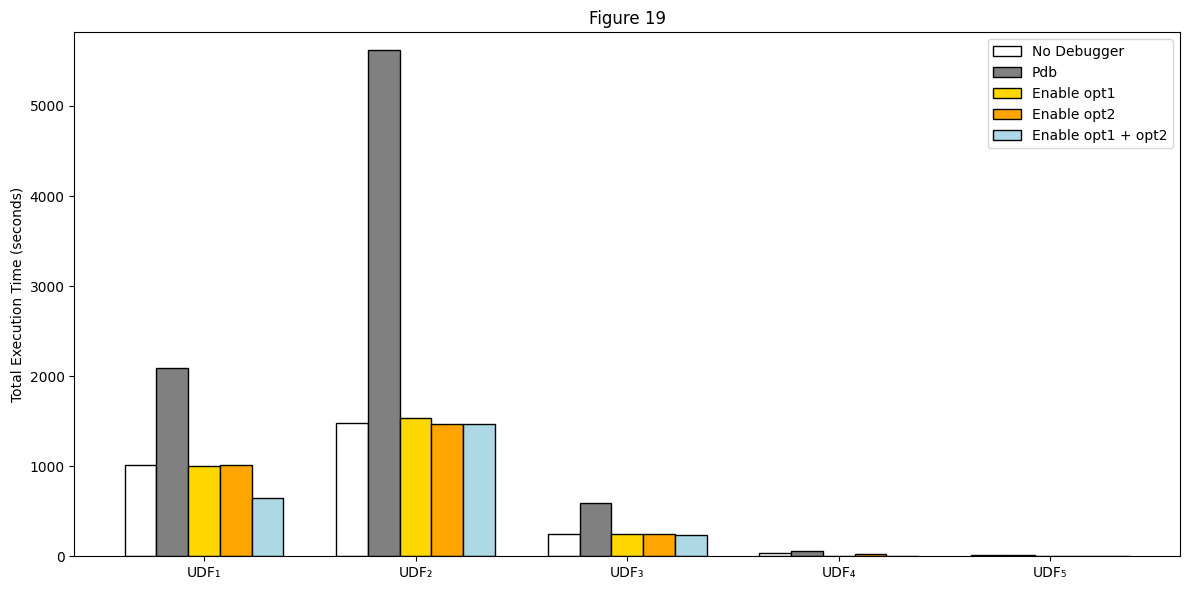

In [31]:
bar_width = 0.15
x = np.arange(len(udfs))

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - 2 * bar_width, udf_time_no_debug, bar_width, color='white', edgecolor='black', label='No Debugger')
ax.bar(x - bar_width, udf_time_debug, bar_width, color='gray', edgecolor='black', label='Pdb')
ax.bar(x, udf_time_op1, bar_width, color='gold', edgecolor='black', label='Enable opt1')
ax.bar(x + bar_width, udf_time_op2, bar_width, color='orange', edgecolor='black', label='Enable opt2')
ax.bar(x + 2 * bar_width, udf_time_op1_op2, bar_width, color='lightblue', edgecolor='black', label='Enable opt1 + opt2')

ax.set_ylabel('Total Execution Time (seconds)')
ax.set_xticks(x)
ax.set_xticklabels(udfs)
ax.set_ylim(0, max(udf_time_debug) + 200)
ax.legend(loc='upper right')

plt.title('Figure 19')
plt.tight_layout()
plt.show()

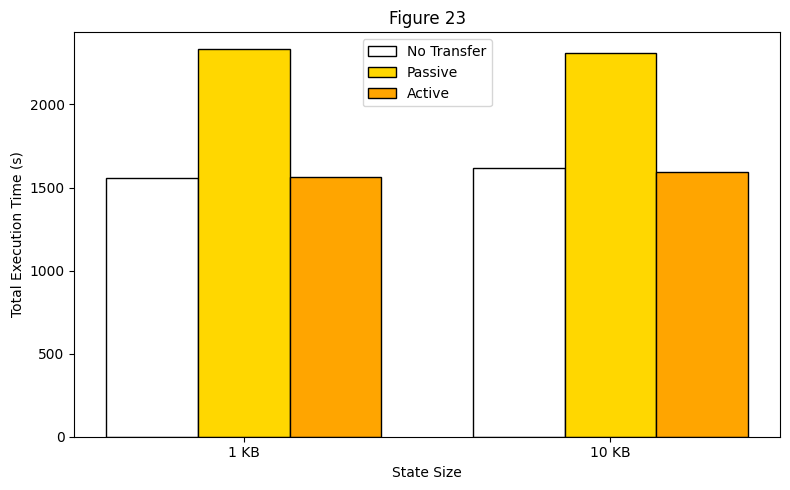

In [30]:
state_sizes = ['1 KB', '10 KB']

no_transfer_times = [fig_23_no_debug_workflow_time_s1[0], fig_23_no_debug_workflow_time_s10[0]]
passive_times = [fig_23_passive_workflow_time_s1[0], fig_23_passive_workflow_time_s10[0]]
active_times = [fig_23_active_workflow_time_s1[0], fig_23_active_workflow_time_s10[0]]

bar_width = 0.25
x = np.arange(len(state_sizes))

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width, no_transfer_times, bar_width, color='white', edgecolor='black', label='No Transfer')
ax.bar(x, passive_times, bar_width, color='gold', edgecolor='black', label='Passive')
ax.bar(x + bar_width, active_times, bar_width, color='orange', edgecolor='black', label='Active')

ax.set_xlabel('State Size')
ax.set_ylabel('Total Execution Time (s)')
ax.set_xticks(x)
ax.set_xticklabels(state_sizes)
ax.set_ylim(0, max(max(no_transfer_times), max(passive_times), max(active_times)) + 100)
ax.legend(loc='best')

plt.title('Figure 23')
plt.tight_layout()
plt.show()


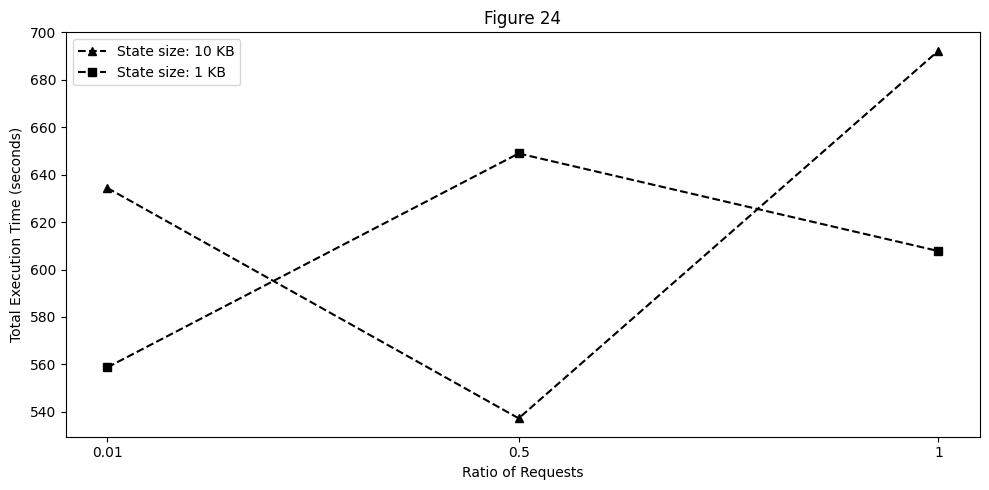

In [54]:
plt.figure(figsize=(10, 5))

plt.plot(ratios, fig24_state_10_8c82afbd, marker='^', linestyle='--', color='black', label='State size: 10 KB')

plt.plot(ratios, fig24_state_1_8c82afbd, marker='s', linestyle='--', color='black', label='State size: 1 KB')

plt.xticks(ratios, labels=[str(r) for r in ratios])
plt.xlabel('Ratio of Requests')
plt.ylabel('Total Execution Time (seconds)')
plt.title('Figure 24')


# Adding legend
plt.legend(loc='best')

# Display plot
plt.tight_layout()
plt.show()